## Fish Market Linear Regression Example

In [26]:
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load in the data and explore it

In [2]:
df = pd.read_csv("Fish.csv")

In [3]:
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961


In [4]:
df.shape

(159, 7)

In [5]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df.isnull().values.any()

False

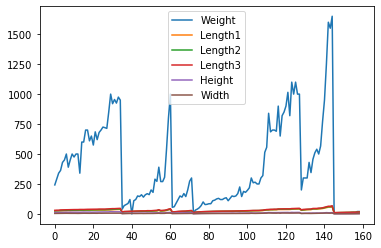

In [8]:
df.plot()

### Start the model

In [9]:
reg = linear_model.LinearRegression()

In [10]:
X = pd.DataFrame(df.Height)
Y = pd.DataFrame(df.Width)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.3, random_state=4)

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(x_test)

In [21]:
# reg.predict([[19]])

In [22]:
reg.coef_

array([[0.33780131]])

Coefficients: 
 [[0.33780131]]
Mean squared error: 1.21
Coefficient of determination: 0.52


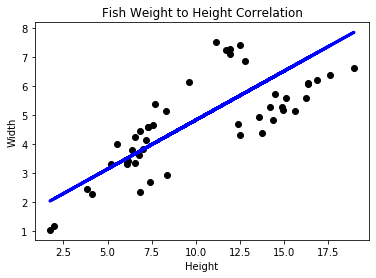

In [34]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.title("Fish Weight to Height Correlation")
plt.ylabel("Width")
plt.xlabel("Height")
plt.yticks()

plt.show()